<a href="https://colab.research.google.com/github/thiagoemrich00/MUSHROOMS_ANALISE/blob/main/Analise_exploratoria_mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO FINAL MUSHROOMS - ANÁLISE EXPLORATÓRIA

## IMPORTAÇÃO DA BASE

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [141]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [142]:
df.shape

(8124, 23)

##Pandas Profiling

In [143]:
!pip install pandas-profiling==2.8.0

In [144]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Mushrooms Data Profiling')
profile

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [145]:
# GERANDO UM ARQUIVO HTML COM AS INFORMAÇÕES DO PROFILEREPORT
profile.to_file('mushrooms_profile')

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:251: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Análise Exploratória

In [146]:
df.columns # verificando o nome de cada coluna

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Através do ProfileReport utilizado já temos conhecimento de algumas correlações fortes do banco de dados, a primeira trata-se da toxicidade versus o odor dos cogumelos, segue legenda do odor: almond -> a , anise -> i , creosote -> c , fishy -> y , foul -> f, musty -> m , none -> n , pungent -> p , spicy -> s


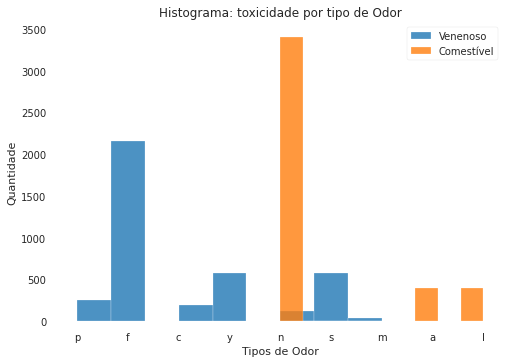

In [147]:
# Separando o df em amostras de cogumelos venenosos e comestíveis

venenoso = df[df['class'] == 'p']
comestivel = df[df['class'] == 'e']

# Histograma Toxicidade versus Odor
plt.hist(venenoso.odor, alpha=0.8, bins=9, label='Venenoso')
plt.hist(comestivel.odor, alpha=0.8,bins=9, label='Comestível')
plt.legend()
plt.title('Histograma: toxicidade por tipo de Odor')
plt.xlabel('Tipos de Odor')
plt.ylabel('Quantidade');

### CONCLUSÃO 1: Observa-se que apenas os odores: almond, anise e inodoro são referentes a cogumelos comestíveis. Sendo que uma pequena amostragem dos cogumelos inodoros são tóxicos. Todos os demais odores são referentes a cogumelos tóxicos.


### A seguir analisaremos a relação entre os tipos de acessórios das guelras (nervuras em baixo do capô) (gill attachment), legenda: "attached -> a , descending -> d , free -> f , notched -> n" e a cor do talo (haste) acima do anel  (stalk-color-above-ring),  legenda das cores: "brown -> n , buff -> b , cinnamon -> c , gray -> g , orange -> o , pink -> p , red -> e , white -> w , yellow -> y"


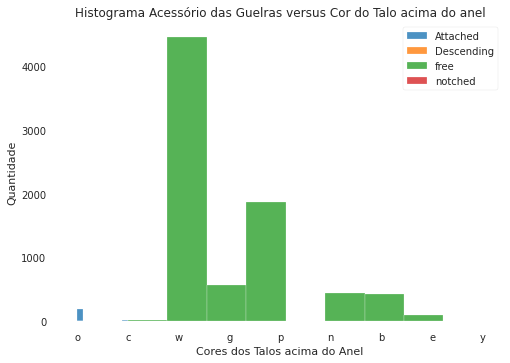

In [148]:
# Separando o df em amostras correspondentes a cada acessório

attached = df[df['gill-attachment'] == 'a']
descending = df[df['gill-attachment'] == 'd']
free = df[df['gill-attachment'] == 'f']
notched = df[df['gill-attachment'] == 'n']

# Histograma Acessório das Guelras versus Cor do Talo acima do anel 
plt.hist(attached['stalk-color-above-ring'], alpha=0.8, bins=9, label='Attached')
plt.hist(descending['stalk-color-above-ring'], alpha=0.8, bins=9, label='Descending')
plt.hist(free['stalk-color-above-ring'], alpha=0.8, bins=9, label='free')
plt.hist(notched['stalk-color-above-ring'], alpha=0.8, bins=9, label='notched')

plt.legend()
plt.title('Histograma Acessório das Guelras versus Cor do Talo acima do anel')
plt.xlabel('Cores dos Talos acima do Anel')
plt.ylabel('Quantidade');

### CONCLUSÃO 2: Podemos ver que não há amostra q tenha acessório notched ou descending. A correlação é bem direta, todos os cogumelos que possuem acessório attached possuem a cor do talo (acima do anel) laranja. E todos os cogumelos com acessório free são das demais cores, sendo maioria cor branca.

### A seguir analisaremos a relação entre os tipos de acessórios das guelras (nervuras em baixo do capô) (gill attachment), legenda: "attached -> a , descending -> d , free -> f , notched -> n" e a cor do talo (haste) ABAIXO do anel  (stalk-color-above-ring),  legenda das cores: "brown -> n , buff -> b , cinnamon -> c , gray -> g , orange -> o , pink -> p , red -> e , white -> w , yellow -> y"


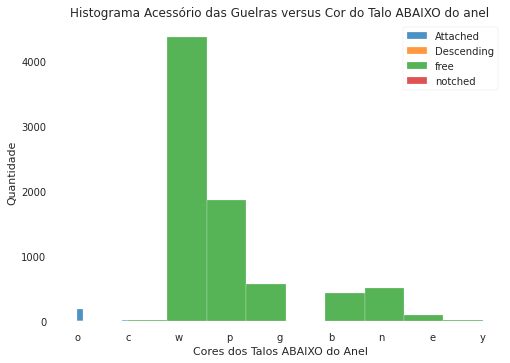

In [149]:
# Separando o df em amostras correspondentes a cada acessório

attached = df[df['gill-attachment'] == 'a']
descending = df[df['gill-attachment'] == 'd']
free = df[df['gill-attachment'] == 'f']
notched = df[df['gill-attachment'] == 'n']

# Histograma Acessório das Guelras versus Cor do Talo acima do anel 
plt.hist(attached['stalk-color-below-ring'], alpha=0.8, bins=9, label='Attached')
plt.hist(descending['stalk-color-below-ring'], alpha=0.8, bins=9, label='Descending')
plt.hist(free['stalk-color-below-ring'], alpha=0.8, bins=9, label='free')
plt.hist(notched['stalk-color-below-ring'], alpha=0.8, bins=9, label='notched')

plt.legend()
plt.title('Histograma Acessório das Guelras versus Cor do Talo ABAIXO do anel')
plt.xlabel('Cores dos Talos ABAIXO do Anel')
plt.ylabel('Quantidade');

### CONCLUSÃO 3: Podemos ver que não há diferença para a análise realizada anteriormente, dessa forma não temos acessório notched ou descending. A correlação é bem direta, todos os cogumelos que possuem acessório attached possuem a cor do talo (ABAIXO do anel): laranja. E todos os cogumelos com acessório free são das demais cores, sendo maioria cor branca.


### A seguir analisaremos a relação entre os tipos de acessórios das guelras (nervuras em baixo do capô) (gill attachment), legenda: "attached -> a , descending -> d , free -> f , notched -> n" e a cor do véu (veil-color),  legenda das cores: "brown -> n , orange -> o , white -> w , yellow -> y"


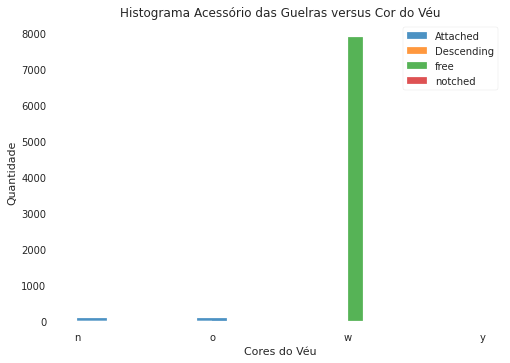

In [150]:
# Separando o df em amostras correspondentes a cada acessório

attached = df[df['gill-attachment'] == 'a']
descending = df[df['gill-attachment'] == 'd']
free = df[df['gill-attachment'] == 'f']
notched = df[df['gill-attachment'] == 'n']

# Histograma Acessório das Guelras versus Cor do Véu
plt.hist(attached['veil-color'], alpha=0.8, bins=9, label='Attached')
plt.hist(descending['veil-color'], alpha=0.8, bins=9, label='Descending')
plt.hist(free['veil-color'], alpha=0.8, bins=9, label='free')
plt.hist(notched['veil-color'], alpha=0.8, bins=9, label='notched')

plt.legend()
plt.title('Histograma Acessório das Guelras versus Cor do Véu')
plt.xlabel('Cores do Véu')
plt.ylabel('Quantidade');

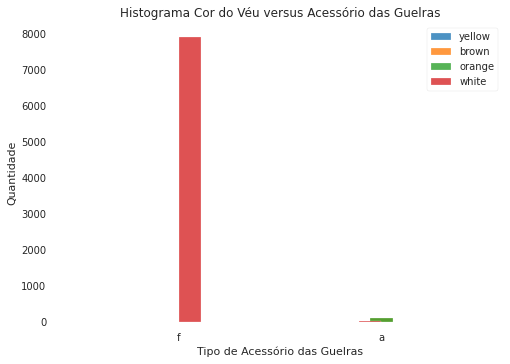

In [151]:

# Separando o df em amostras correspondentes a cada cor

yellow = df[df['veil-color'] == 'y']
brown = df[df['veil-color'] == 'n']
orange = df[df['veil-color'] == 'o']
white = df[df['veil-color'] == 'w']

# Histograma Acessório das Guelras versus Cor do Véu 
plt.hist(yellow['gill-attachment'], alpha=0.8, bins=9, label='yellow')
plt.hist(brown['gill-attachment'], alpha=0.8, bins=9, label='brown')
plt.hist(orange['gill-attachment'], alpha=0.8, bins=9, label='orange')
plt.hist(white['gill-attachment'], alpha=0.8, bins=9, label='white')


plt.legend()
plt.title('Histograma Cor do Véu versus Acessório das Guelras')
plt.xlabel('Tipo de Acessório das Guelras')
plt.ylabel('Quantidade');

### CONCLUSÃO 4: Podemos ver que relação cor do véu branca e a acessório das guelras free é extremamente forte e dominante na amostra. Havedo uma minoria de véu marrom e laranja com o acessório da guelra attached.


# Como seria uma distribuição da toxicidade pelo habitat??

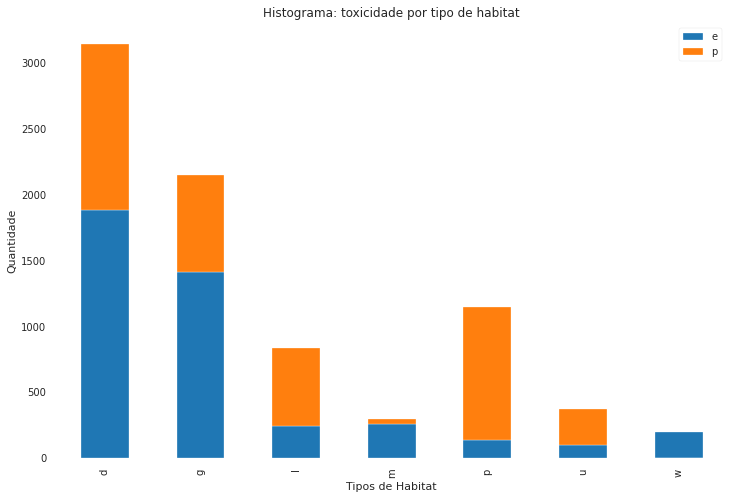

In [152]:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby(['habitat','class']).size().unstack().plot.bar(stacked=True, ax=ax)
plt.legend()
plt.title('Histograma: toxicidade por tipo de habitat')
plt.xlabel('Tipos de Habitat')
plt.ylabel('Quantidade');
plt.show()

### CONCLUSÃO 5: Podemos apenas concluir que no habitat waste mostraram apenas espécies comestíveis.

# Como seria uma distribuição da toxicidade pela forma com que suas populações são encontradas?

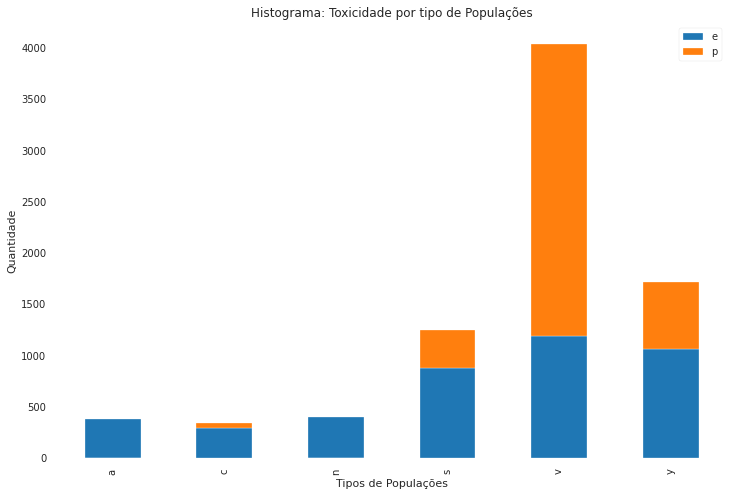

In [153]:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby(['population','class']).size().unstack().plot.bar(stacked=True, ax=ax)
plt.legend()
plt.title('Histograma: Toxicidade por tipo de Populações')
plt.xlabel('Tipos de Populações')
plt.ylabel('Quantidade');
plt.show()

### CONCLUSÃO 6: Podemos concluir que quando a população se encontra abundante e numerosa trata-se de espécies comestíveis, já nos demais modos de povoação, podemos ter espécies tóxicas.

# OBSERVAÇÃO: MAPA DE CALOR - utilizando o labelencoder

#### Pra plotarmos o mapa de calor de correlações, utilizaremos o LabelEncoder pra dar significado numérico à cada valor. Porém, rapidamente percebemos que para o nosso banco de dados em questão, nao fornece informação confiável, pois o label encoder distorce a informação, por exemplo quando falamos de cores, formas, enfim, dados categóricos em geral.
#### Comparando com a matriz de correlação obtido pelo ProfileReport do Pandas Profilling (última figura), fica nítido a divergência dos resultados.

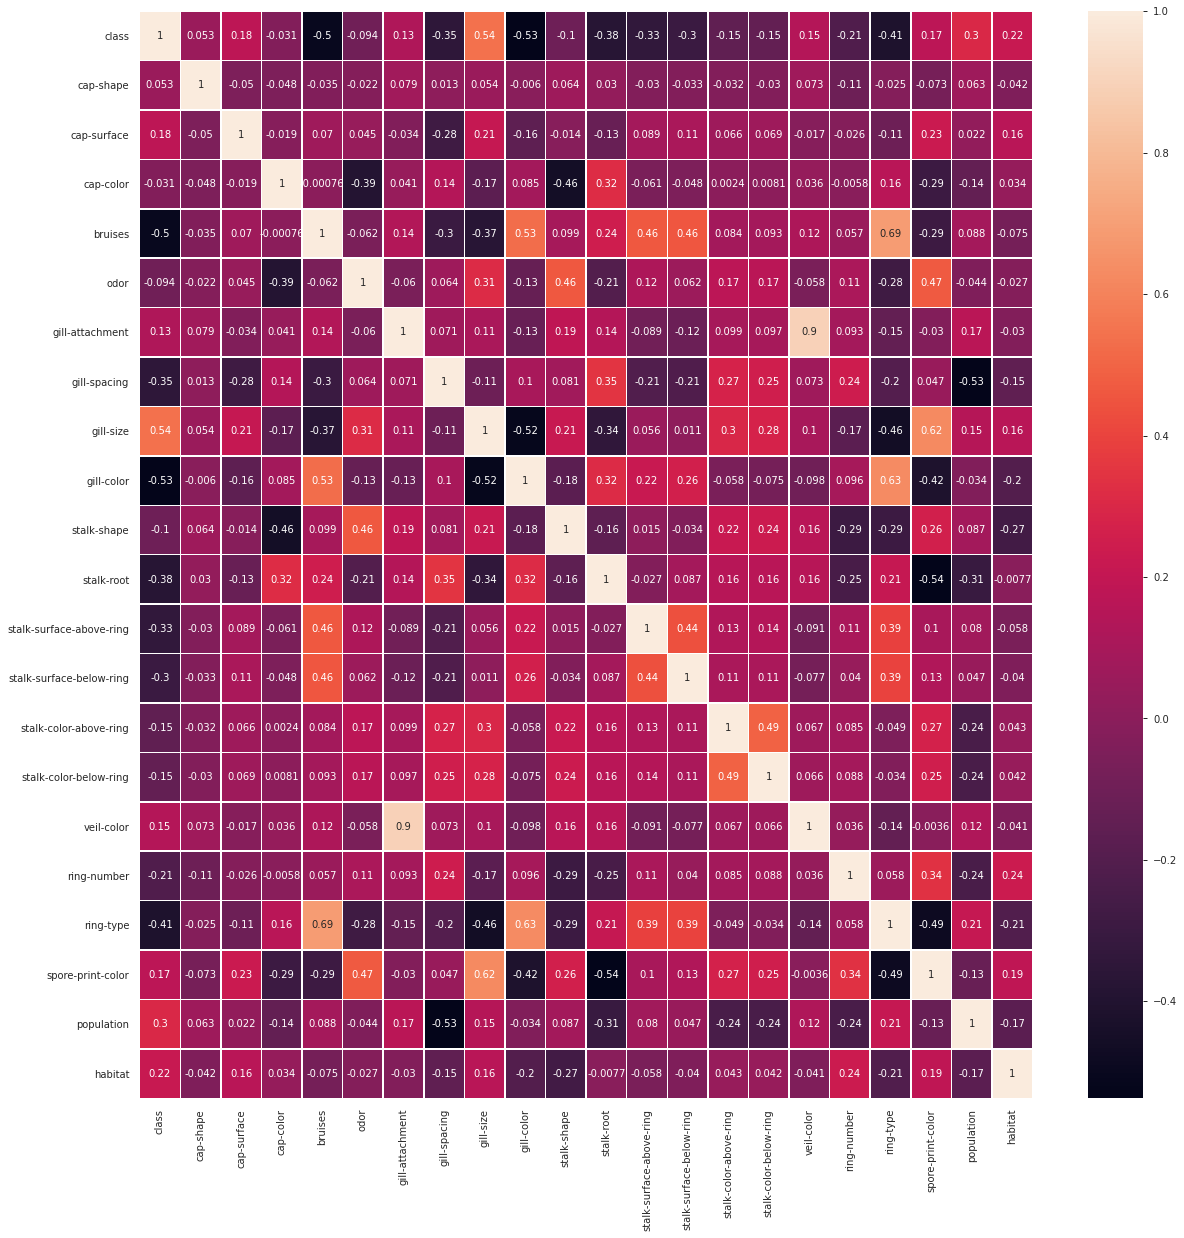

In [154]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.drop(['veil-type'], axis=1, inplace=True) #excuir essa coluna veil-type, pois nao adiciona informação ao df.
df.corr
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, ax=ax)
plt.show()

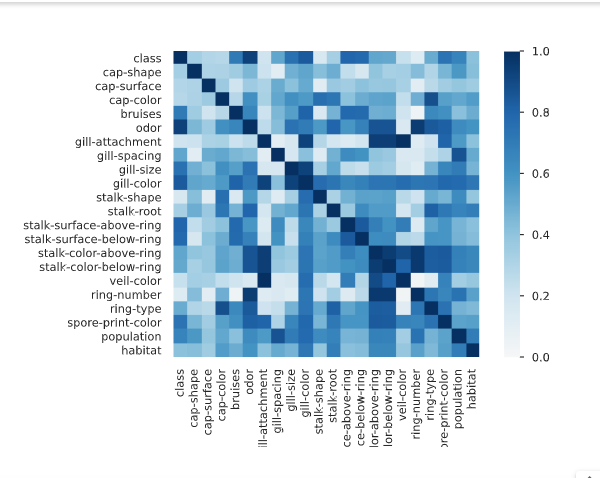